## Anomaly Detection_One-Class SVM

A One-class classification method is used to detect the outliers and anomalies in a dataset. Based on Support Vector Machines (SVM) evaluation, the One-class SVM applies a One-class classification method for novelty detection.
   The tutorial briefly explains how to detect anomaly in a dataset by using the One-class SVM method in Python.

In this part, we try to create a synthetic data and understand the theory behind One-class SVM for Anomaly detection.

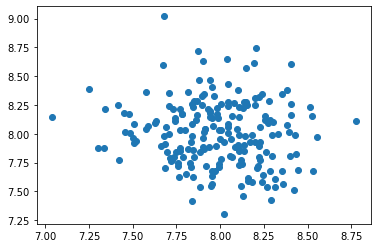

OneClassSVM(gamma=0.001, nu=0.03)


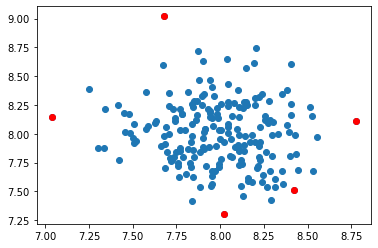

OneClassSVM(gamma=0.001, nu=0.02)
3.994389673293594


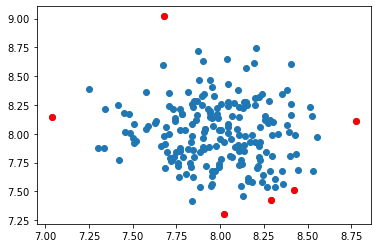

In [1]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

random.seed(13)
x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(8, 8))

plt.scatter(x[:,0], x[:,1])
plt.show()

svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
print(svm)

svm.fit(x)
pred = svm.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.02)
print(svm)

pred = svm.fit_predict(x)
scores = svm.score_samples(x)

thresh = quantile(scores, 0.03)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

In [3]:
x=pd.read_csv('SOCR-HeightWeight.csv')
print(x)

       Height  Weight
0       61.93   78.01
1       61.91   78.57
2       66.57   82.38
3       63.13   83.09
4       65.47   83.34
...       ...     ...
24995   72.32  168.23
24996   73.52  168.88
24997   69.57  169.13
24998   74.30  170.55
24999   70.71  170.92

[25000 rows x 2 columns]


In [4]:
x.shape

(25000, 2)

In [5]:
x= x.values

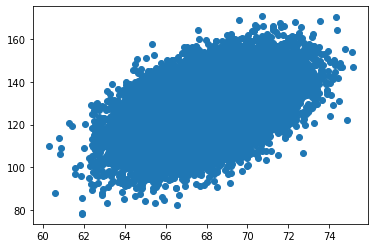

In [6]:
plt.scatter(x[:,0], x[:,1])
plt.show()

We'll define the model by using the OneClassSVM class of Scikit-learn API. Here, we'll set RBF for kernel type and define the gamma and the 'nu' arguments.

In [7]:
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.02)
print(svm)

OneClassSVM(gamma=0.001, nu=0.02)


We'll fit the model with x dataset and get the prediction data by using the fit() and predict() method.

In [8]:
svm.fit(x)
pred = svm.predict(x)

Next, we'll extract the negative outputs as the outliers.

In [9]:
anom_index = where(pred==-1)
values = x[anom_index]

Finally, we'll visualize the results in a plot by highlighting the anomalies with a color.

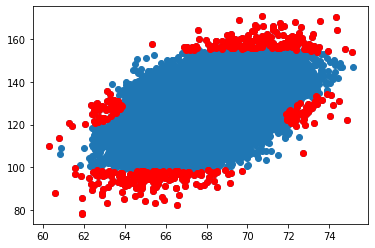

In [10]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

Anomaly detection with scores

We can find anomalies by using their scores. In this method, we'll define the model, fit it on the x data by using the fit_predict() method. We'll calculate the outliers according to the score value of each element.

In [11]:
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
print(svm)

OneClassSVM(gamma=0.001, nu=0.03)


Next, we'll fit the model on x dataset, then extract the samples score.

In [12]:
pred = svm.fit_predict(x)
scores = svm.score_samples(x)

Next, we'll obtain the threshold value from the scores by using the quantile function. Here, we'll get the lowest 3 percent of score values as the anomalies.

In [13]:
thresh = quantile(scores, 0.03)
print(thresh)

374.9538840428008


Next, we'll extract the anomalies by comparing the threshold value and identify the values of elements.

In [14]:
index = where(scores<=thresh)
values = x[index]

Finally, we can visualize the results in a plot by highlighting the anomalies with a color.

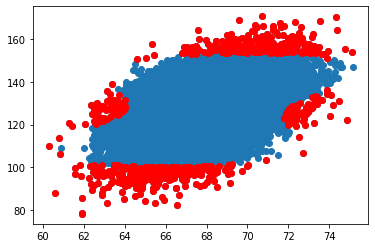

In [15]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()